In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load data
df = pd.read_csv('/content/Infrared.csv')

In [5]:
display(df.head())
df.info()

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,37.04


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

In [7]:
display(df.describe())
print(df.isnull().sum())

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
count,1020.000000,1020.000000,1018.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,35.011345,35.659921,35.587143,...,34.567782,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277,37.028382
std,1.336338,13.071627,2.456486,0.362587,0.574888,0.549760,0.718613,0.633836,0.553897,0.569278,...,0.669410,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316,0.509502
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,...,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000,35.540000
25%,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,34.651250,35.332500,35.249375,...,34.180000,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000,36.777500
50%,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,34.997500,35.602500,35.533750,...,34.597500,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000,36.940000
75%,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,35.363125,35.910625,35.855625,...,34.968125,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625,37.140000
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,...,37.075000,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000,40.340000


Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralM       0
dtype: int64


In [8]:
#cleaning
df_cleaned = df.dropna()
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned.info()

print(df_cleaned.isnull().sum())
display(df_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 0 to 1019
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1018 non-null   object 
 1   Age          1018 non-null   object 
 2   Ethnicity    1018 non-null   object 
 3   T_atm        1018 non-null   float64
 4   Humidity     1018 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1018 non-null   float64
 7   Max1R13_1    1018 non-null   float64
 8   Max1L13_1    1018 non-null   float64
 9   aveAllR13_1  1018 non-null   float64
 10  aveAllL13_1  1018 non-null   float64
 11  T_RC1        1018 non-null   float64
 12  T_RC_Dry1    1018 non-null   float64
 13  T_RC_Wet1    1018 non-null   float64
 14  T_RC_Max1    1018 non-null   float64
 15  T_LC1        1018 non-null   float64
 16  T_LC_Dry1    1018 non-null   float64
 17  T_LC_Wet1    1018 non-null   float64
 18  T_LC_Max1    1018 non-null   float64
 19  RCC1       

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,37.04


In [16]:
# ================================
# 1. Ubah target 'aveOralM' menjadi kelas kategori (3 kelas)
# ================================
y_binned = pd.qcut(df_encoded['aveOralM'], q=3, labels=[0, 1, 2])

# Fitur dan target
X = df_encoded.drop(columns=['aveOralM'])
y = y_binned.astype(int)  # pastikan bentuk integer (diskret)

# ================================
# 2. Split data train/test
# ================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ================================
# 3. Standarisasi fitur (untuk KNN)
# ================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ================================
# 4. MODEL 1: K-Nearest Neighbors
# ================================
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("📌 K-Nearest Neighbors (K-NN)")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# ================================
# 5. MODEL 2: Decision Tree
# ================================
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("\n🌳 Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))

📌 K-Nearest Neighbors (K-NN)
Accuracy: 0.5833333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.76      0.65        70
           1       0.51      0.53      0.52        74
           2       0.79      0.45      0.57        60

    accuracy                           0.58       204
   macro avg       0.62      0.58      0.58       204
weighted avg       0.61      0.58      0.58       204


🌳 Decision Tree
Accuracy: 0.46078431372549017
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.54      0.54        70
           1       0.37      0.35      0.36        74
           2       0.48      0.50      0.49        60

    accuracy                           0.46       204
   macro avg       0.46      0.46      0.46       204
weighted avg       0.46      0.46      0.46       204



In [18]:
# Evaluasi K-NN
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("🔹 K-NN:")
print("MSE     :", mse_knn)
print("RMSE    :", rmse_knn)
print("R² Score:", r2_knn)

# Evaluasi Decision Tree
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\n🔹 Decision Tree:")
print("MSE     :", mse_tree)
print("RMSE    :", rmse_tree)
print("R² Score:", r2_tree)

🔹 K-NN:
MSE     : 0.5931372549019608
RMSE    : 0.7701540462154054
R² Score: 0.06570779712339125

🔹 Decision Tree:
MSE     : 0.803921568627451
RMSE    : 0.8966167345234256
R² Score: -0.2663133989401969


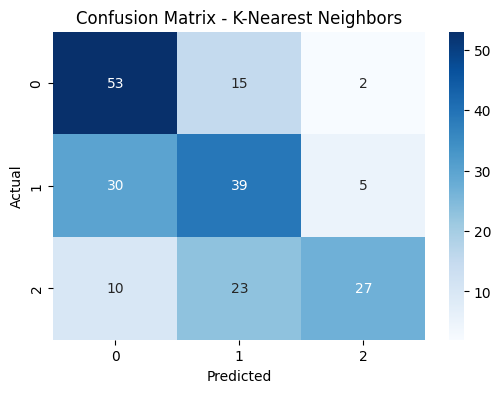

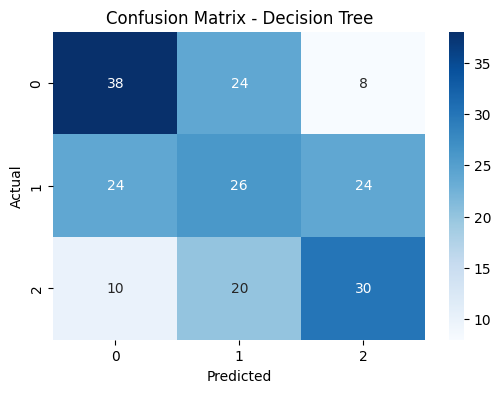

In [20]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {title}")
    plt.show()

# Confusion Matrix untuk K-NN
plot_conf_matrix(y_test, y_pred_knn, "K-Nearest Neighbors")

# Confusion Matrix untuk Decision Tree
plot_conf_matrix(y_test, y_pred_tree, "Decision Tree")

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


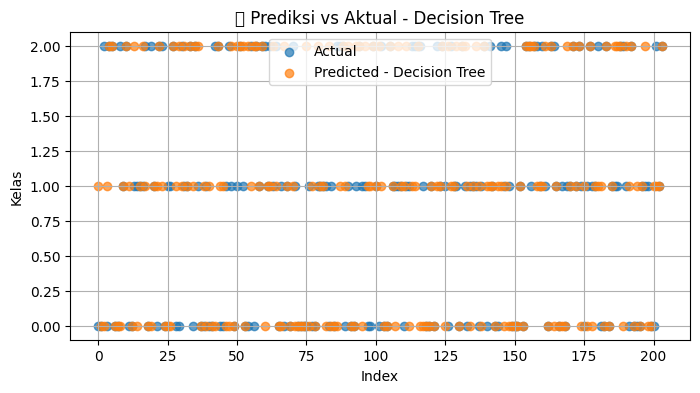

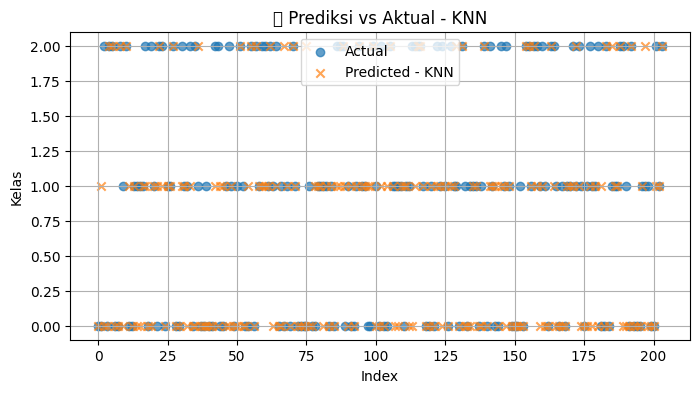

In [21]:
# Visualisasi Prediksi vs Aktual - Decision Tree
plt.figure(figsize=(8, 4))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.7)
plt.scatter(range(len(y_pred_tree)), y_pred_tree, label='Predicted - Decision Tree', alpha=0.7)
plt.title("📉 Prediksi vs Aktual - Decision Tree")
plt.xlabel("Index")
plt.ylabel("Kelas")
plt.legend()
plt.grid(True)
plt.show()

# Visualisasi Prediksi vs Aktual - KNN
plt.figure(figsize=(8, 4))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.7)
plt.scatter(range(len(y_pred_knn)), y_pred_knn, label='Predicted - KNN', alpha=0.7, marker='x')
plt.title("📉 Prediksi vs Aktual - KNN")
plt.xlabel("Index")
plt.ylabel("Kelas")
plt.legend()
plt.grid(True)
plt.show()

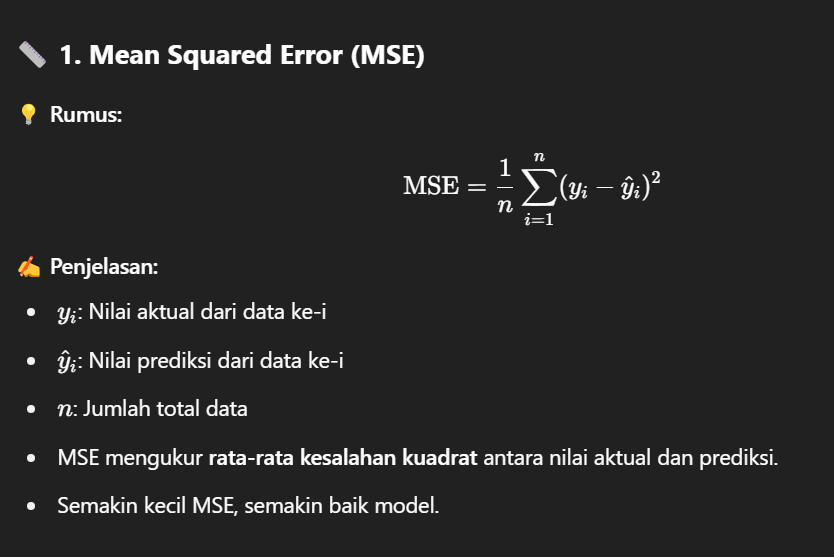

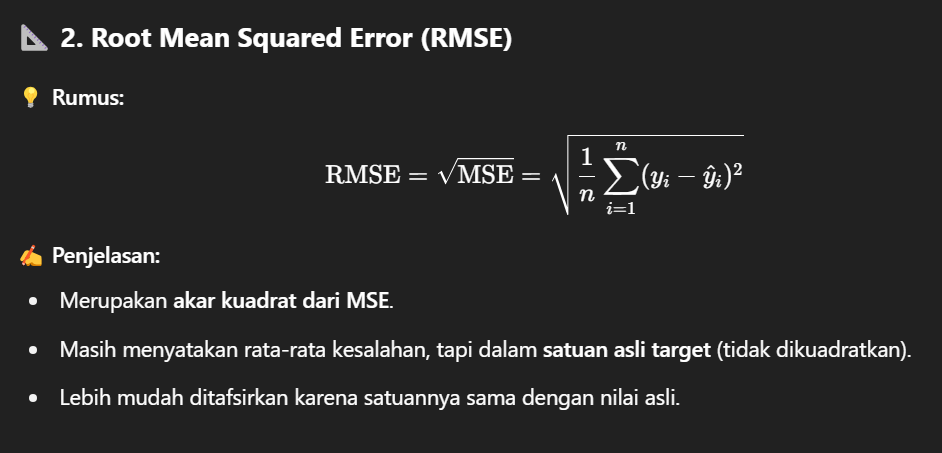

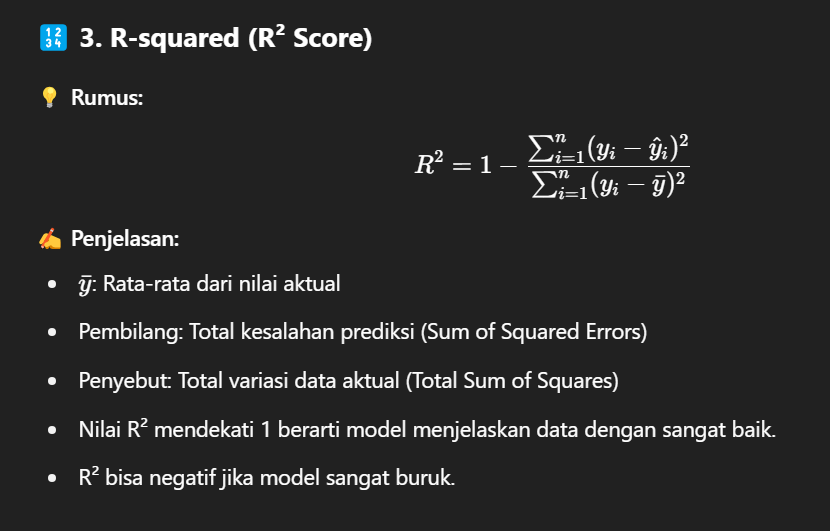

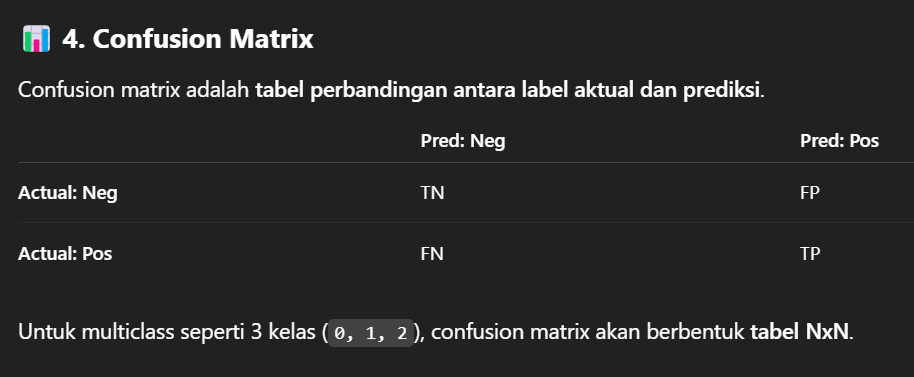

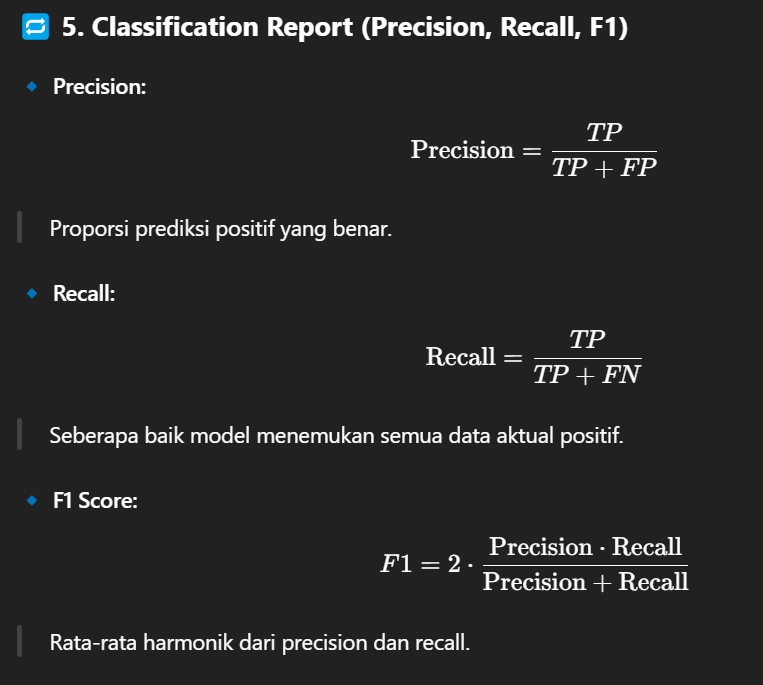